In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

def show_torch_info():
    print(f"Torch v.{torch.__version__}")
    print(f"Cuda avialiable: {torch.cuda.is_available()}")

show_torch_info()

Torch v.1.12.1
Cuda avialiable: False


### Three classes
Note: https://lecture-demo.ira.uka.de/neural-network-demo/?preset=Three%20classes%20test

In [3]:
#data
class ThreeClasses(torch.utils.data.IterableDataset):
    def __init__(self):
        super().__init__()
        self.data = [
            (torch.tensor([1.4, 1.3]),                                  torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([1.56, 1.36]),                                torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([1.36, 1.36]),                                torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([1.46, 1.36]),                                torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([1.14, 1.26]),                                torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([0.96, 0.97]),                                torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([1.04, 0.76]),                                torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([1.43, 0.81]),                                torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([1.3, 1.05]),                                 torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([1.45, 1.22]),                                torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([2.04, 1.1]),                                 torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([1.06, 0.28]),                                torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([0.96, 0.57]),                                torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([1.28, 0.46]),                                torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([1.51, 0.33]),                                torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([1.65, 0.68]),                                torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([1.67, 1.01]),                                torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([1.5, 1.83]),                                 torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([0.76, 1.69]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([0.4, 0.71]),                                 torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([0.61, 1.18]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([0.26, 1.42]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([0.28, 1.89]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([1.37, 1.89]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([1.11, 1.9]),                                 torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([1.05, 2.04]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([2.43, 1.42]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([2.39, 1.2]),                                 torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([2.1, 1.53]),                                 torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([1.89, 1.72]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([2.69, 0.72]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([2.96, 0.44]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([2.5, 0.79]),                                 torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([2.85, 1.23]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([2.82, 1.37]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([1.93, 1.9]),                                 torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([2.18, 1.77]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([2.29, 0.39]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([2.57, 0.22]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([2.7, -0.11]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([1.96, -0.2]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([1.89, -0.1]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([1.77, 0.13]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([0.73, 0.01]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([0.37, 0.31]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([0.46, 0.44]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([0.48, 0.11]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([0.37, -0.1]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([1.03, -0.42]),                               torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([1.35, -0.25]),                               torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([1.17, 0.01]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([0.12, 0.94]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([2.05, 0.32]),                                torch.tensor([0,1,0], dtype=torch.float32)),
            (torch.tensor([1.97, 0.55]),                                torch.tensor([1,0,0], dtype=torch.float32)),
            (torch.tensor([0.7860082304526748, 2.5761316872427984]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([-0.09053497942386843, 2.3909465020576133]),  torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([-0.23868312757201657, 2.0329218106995888]),  torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([-0.32510288065843634, 1.748971193415638]),   torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([-0.6707818930041154, 1.4526748971193417]),   torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([-0.3991769547325104, 1.094650205761317]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([-0.2263374485596709, 0.6131687242798356]),   torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([-0.2263374485596709, -0.42386831275720144]), torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([-0.13991769547325114, -0.6584362139917693]), torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([1.5390946502057612, -1.0658436213991767]),   torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([2.193415637860082, -1.0781893004115224]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([2.6502057613168724, -0.9176954732510286]),   torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.193415637860082, -0.6460905349794236]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.526748971193415, -0.42386831275720144]),   torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.4403292181069953, 0.329218106995885]),     torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.4773662551440325, 1.0452674897119343]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.6625514403292176, 1.2798353909465023]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([2.8847736625514404, 2.946502057613169]),     torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([1.4156378600823043, 2.5514403292181074]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([1.045267489711934, 2.526748971193416]),      torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([2.5144032921810697, 2.1563786008230457]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.045267489711934, 1.7983539094650207]),     torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([2.366255144032922, 2.9341563786008233]),     torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([1.5020576131687242, 3.0576131687242802]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([0.5390946502057612, 2.711934156378601]),     torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([-0.300411522633745, 2.5761316872427984]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([-0.7942386831275722, 2.563786008230453]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([-1.1646090534979425, 1.181069958847737]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([-1.1275720164609055, 0.5637860082304529]),   torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([-0.5226337448559671, 0.46502057613168746]),  torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([-0.4115226337448561, -0.05349794238683104]), torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([-0.1646090534979425, -0.7325102880658434]),  torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([0.4650205761316871, -0.8436213991769544]),   torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([0.8106995884773661, -1.164609053497942]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([0.32921810699588466, -1.3004115226337447]),  torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([1.1687242798353907, -1.127572016460905]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([2.1316872427983538, -1.362139917695473]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([1.7119341563786008, -0.6954732510288063]),   torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([2.5267489711934155, -0.8930041152263373]),   torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([2.8971193415637857, -0.8930041152263373]),   torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([2.6378600823045266, -0.6460905349794236]),   torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.2427983539094645, -0.5349794238683125]),   torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.8477366255144028, 0.02057613168724303]),   torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.390946502057613, 0.02057613168724303]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.4403292181069953, 0.3415637860082307]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.7983539094650203, 0.6502057613168727]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.526748971193415, 0.983539094650206]),      torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.452674897119341, 1.4526748971193417]),     torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.502057613168724, 1.7242798353909468]),     torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.415637860082304, 2.205761316872428]),      torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([2.736625514403292, 2.292181069958848]),      torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([1.9465020576131686, 2.403292181069959]),     torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([1.8230452674897117, 2.60082304526749]),      torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([3.008230452674897, -1.288065843621399]),     torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([1.699588477366255, -1.016460905349794]),     torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([2.045267489711934, -0.9053497942386829]),    torch.tensor([0,0,1], dtype=torch.float32)),
            (torch.tensor([1.8724279835390945, -1.2263374485596705]),   torch.tensor([0,0,1], dtype=torch.float32)),
        ]

    def __iter__(self):
        return iter(self.data)
    
    def __len__(self):
        return len(self.data)

training_set = ThreeClasses()

In [4]:
class ThreeClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.l = nn.Linear(2,4)
        self.out = nn.Linear(4,3)
    
    def forward(self, t):
        t = torch.sigmoid(self.l(t))
        t = torch.sigmoid(self.out(t))
        return t

print(ThreeClassifier())

ThreeClassifier(
  (l): Linear(in_features=2, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=3, bias=True)
)


In [77]:
torch.manual_seed(250) #221 250
network = ThreeClassifier()
training_loader = torch.utils.data.DataLoader(training_set, batch_size=57)
optimizer = optim.Adam(network.parameters(), lr=0.002)
loss_f = nn.CrossEntropyLoss()
NUM_EPOCHS = 20000

print(f"prepared a training set of {len(training_set)} samples")

prepared a training set of 111 samples


In [78]:
losses_history = []
correct_history = []
for epoch in range(NUM_EPOCHS):
    total_loss = 0
    total_correct = 0
    
    for batch in training_loader:
        inputs, expected = batch
        
        predictions = network(inputs)
        loss = loss_f(predictions, expected)
        total_loss += loss.item()
        total_correct += predictions.argmax(dim=1).eq(expected.argmax(dim=1)).sum().item()

        loss.backward()
        optimizer.step()

    losses_history.append(total_loss)
    correct_history.append(total_correct/len(training_set))

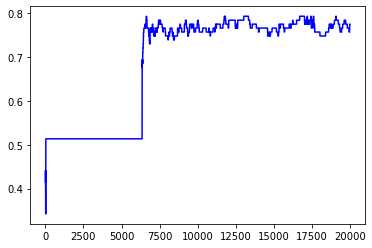

In [80]:
import matplotlib.pyplot as plt
#plt.plot([l for l in losses_history], 'r')
plt.plot([c for c in correct_history], 'b')
plt.show()